Michelle Cronin
<br><br>
General Assembly - Data Science
<br><br>
Homework 1 - Titanic
<br><br>
January 11, 2016

In [402]:
#import necessary libraries to start
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib
%matplotlib inline

In [70]:
#import data
data = pd.read_csv("titanic_dropna.csv", sep=",")
#create a copy in case of mistakes
datacopy = data.copy()

<h2>1) What do you notice about the data? Any issues?</h2>

<ul>
    <li>The data already had descriptive headers</li>
    <li>The data has 712 rows and 12 columns</li>
    <li>Each passenger was given a passenger ID number
    <li>Married women are given two names:  their married and maiden names</li>
    <li>Whether or not a person survived is represented by 1 (survived) or 0 (did not survive)--so integers instead of strings</li>
    <li>2 float and 5 int columns; the other 5 are strings
    <li>Some tickets have non-numeric characters before a series of 5-6 digits; unclear why
    <li>Issue: "Fare" is not in standard currency ending at the hundredths place; decimal places go on too long
    <li>Issue: Weird to me that "Age" is represented as a float instead of an int (later became clear for infants)
    <li>Issue: The "Cabin" column still has missing data</li>
    <li>Issue: Some of the data isn't clear to me - I'm not sure what the following represents:  "SibSp," "Parch," the letters in "Ticket," and the letters in "Embarked"--so I looked these up ("SibSp" for number of siblings or spouses, "Parch" for parents or children, and "Embarked" for city)</li> 
</ul>

In [71]:
# Initial exploratory data is in lines below
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [72]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,NaN,Q
708,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,NaN,S
709,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
710,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
711,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,NaN,Q


In [73]:
data.shape

(712, 12)

In [74]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 711
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [76]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [526]:
#drop "Cabin" column since it has almost 75% missing values; error message probably because I did it twice
data.drop(["Cabin"], inplace=True, axis=1)

ValueError: labels ['Cabin'] not contained in axis

In [90]:
#Confirm "Cabin" column has been successfully dropped
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


<h2>2) What is the overall survival rate?</h2>

To find the overall survival rate, I knew that I needed to divide the number of survivors by the total number of passengers. I also knew that this result needed to match the mean (.4044494) from the "Survived" column when I had called data.describe() during the initial exploratory stage.
<br><br>
One thing I noticed about the data is that under the "Survived" column, survivors are represented by 1, while non-surivors are represented by 0. Therefore, I realized that I could find the total number of survivors by summing all of the numbers (or ones) in the "Survived" column. The total number of survivors came to 288.
<br><br>
To find the total number of passengers, I used count. However, I also knew that the number of passengers needed to match the number of rows. The total number of passengers came to 712.
<br><br>
After dividing the 288 by 712 and multiplying by 100 to get a percentage, I arrived at a <b>40.45%</b> survival rate. This number matches the target mean from the exploratory stage above.

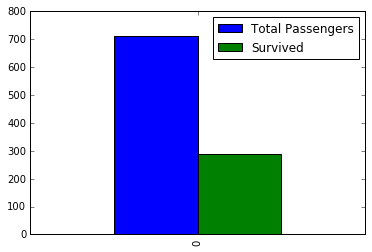

In [349]:
surv_df.plot(kind="bar", y=["Total Passengers", "Survived"]);

In [79]:
# Find number of survivors
surv_sum = data["Survived"].sum(axis=0)
surv_sum

288

In [80]:
# Find total number of passengers (should be 712!)
passengers_count = len(data["Survived"])
passengers_count

712

In [81]:
# Divide number of survivors by total number of passengers to find overall survivor rate
survivor_rate = (float(surv_sum)/passengers_count) * 100
survivor_rate = round(survivor_rate, 2)
print "The overall survivor rate is %r%%" % survivor_rate

The overall survivor rate is 40.45%


In [223]:
surv_data = ({"Total Passengers": [passengers_count],
                   "Survived": [surv_sum],})
surv_df = pd.DataFrame(surv_data, columns=["Total Passengers", "Survived"])
surv_df

,Total Passengers,Survived
0,712,288


In [327]:
#Place the rate into the dataframe
surv_df["Survival Rate"] = surv_df["Survived"]/surv_df["Total Passengers"]
surv_df

,Total Passengers,Survived,Survival Rate
0,712,288,0.404494


<h2>3) What role does gender play in surviving?</h2>

In the intro video, we were told that women and children were instructed to flee the ship before men could. Perhaps unsurprisingly, gender played a huge role in survival. Of the 288 survivors, 195 (~68%) were female and 93 (~32%) were male. Of the 259 female passengers, 195 survived (~75%), while only ~21% of males (93 of 453) survived. Thus, females were much more likely to survive the sinking of the Titanic than were males.

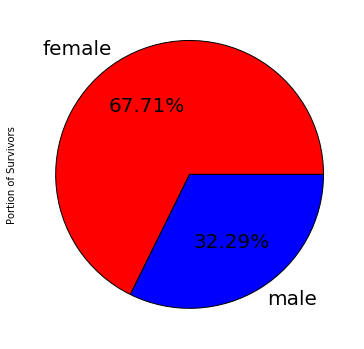

In [324]:
all_gender["Portion of Survivors"].plot(subplots=True, kind="pie", labels=["female", "male"], colors=["r", "b"], fontsize=20, autopct='%.2f%%', figsize=(6,6));

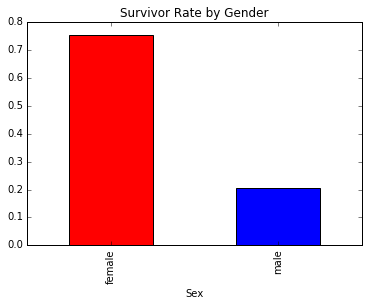

In [322]:
all_gender["Survivor Rate by Gender"].plot(subplots=True, kind="bar", color=["r", "b"]);

In [82]:
#Find the number of survivors by each gender
gender = data.groupby(["Sex"])["Survived"].sum()

#turn data into a dataframe for easy retrieval
gender = pd.DataFrame(gender)
gender

,Survived
Sex,
female,195
male,93


In [301]:
#Find number of total passengers per gender (through count)
gender_total = data.groupby(["Sex"])["Survived"].count()
gender_total = pd.DataFrame(gender_total)
gender_total = gender_total.rename(columns={"Survived": "Total Passengers Per Gender"})
gender_total

,Total Passengers Per Gender
Sex,
female,259
male,453


In [302]:
#Combine the two pieces together
all_gender = pd.concat([gender_total, gender,], axis=1)
all_gender

,Total Passengers Per Gender,Survived
Sex,,
female,259,195
male,453,93


In [303]:
#Find survivor rate within gender
all_gender["Survivor Rate by Gender"] = all_gender["Survived"]/all_gender["Total Passengers Per Gender"]
all_gender

,Total Passengers Per Gender,Survived,Survivor Rate by Gender
Sex,,,
female,259,195,0.752896
male,453,93,0.205298


In [304]:
#This will show how much each gender composes the survivor population
all_gender["Portion of Survivors"] = [float(i)/surv_sum for i in all_gender["Survived"]]
all_gender

,Total Passengers Per Gender,Survived,Survivor Rate by Gender,Portion of Survivors
Sex,,,,
female,259,195,0.752896,0.677083
male,453,93,0.205298,0.322917


In [305]:
#This will show the overall survivor rate
all_gender["Overall Rate of Survival"] = [float(i)/passengers_count for i in all_gender["Survived"]]
all_gender

,Total Passengers Per Gender,Survived,Survivor Rate by Gender,Portion of Survivors,Overall Rate of Survival
Sex,,,,,
female,259,195,0.752896,0.677083,0.273876
male,453,93,0.205298,0.322917,0.130618


<h2>4) What role does class play in surviving?</h2>

Class played a  significant role in survival on the Titanic, but mainly if a person was lucky (or rich) enough to gain entry to the first class. Within the population of survivors, members of the first class composed of ~42% (120) of the  288 survivors. However, they had a survival rate of over 50% within their own class, meaning the liklihood of surviving if one were in the first class was ~65%. Those in the second class survived at a rate of ~48%, while the third class fared the worst at ~24%. In other words, class definitely mattered.

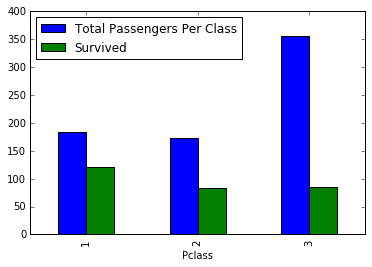

In [354]:
#Create a bar plot to compare survivors per class
all_pass_class.plot(kind="bar", y=["Total Passengers Per Class", "Survived"]);

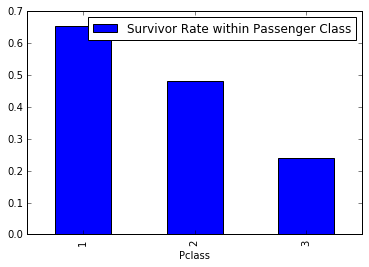

In [360]:
#Compare survivor rates within each passenger class
all_pass_class.plot(kind="bar", y=["Survivor Rate within Passenger Class"],);

In [259]:
#Find the number of survivors by each passenger class
passclass = data.groupby(["Pclass"])["Survived"].sum()

#turn data into a dataframe for easy retrieval
passclass = pd.DataFrame(passclass)
passclass

,Survived
Pclass,
1,120
2,83
3,85


In [292]:
#Find number of total passengers per class (through count)
total_per_class = data.groupby(["Pclass"])["Survived"].count()
total_per_class = pd.DataFrame(total_per_class)
total_per_class = total_per_class.rename(columns={"Survived": "Total Passengers Per Class"})
total_per_class

,Total Passengers Per Class
Pclass,
1,184
2,173
3,355


In [293]:
#Combine the two pieces together
all_pass_class = pd.concat([total_per_class, passclass,], axis=1)
all_pass_class

,Total Passengers Per Class,Survived
Pclass,,
1,184,120
2,173,83
3,355,85


In [296]:
#Find survivor rate within passenger class
all_pass_class["Survivor Rate within Passenger Class"] = all_pass_class["Survived"]/all_pass_class["Total Passengers Per Class"]
all_pass_class

,Total Passengers Per Class,Survived,Survivor Rate within Passenger Class
Pclass,,,
1,184,120,0.652174
2,173,83,0.479769
3,355,85,0.239437


In [299]:
#This will show how much each passenger class composes the survivor population
all_pass_class["Portion of Survivors"] = [float(i)/surv_sum for i in all_pass_class["Survived"]]
all_pass_class

,Total Passengers Per Class,Survived,Survivor Rate within Passenger Class,Portion of Survivors
Pclass,,,,
1,184,120,0.652174,0.416667
2,173,83,0.479769,0.288194
3,355,85,0.239437,0.295139


In [300]:
#This will show the overall survivor rate
all_pass_class["Overall Rate of Survival"] = [float(i)/passengers_count for i in all_pass_class["Survived"]]
all_pass_class

,Total Passengers Per Class,Survived,Survivor Rate within Passenger Class,Portion of Survivors,Overall Rate of Survival
Pclass,,,,,
1,184,120,0.652174,0.416667,0.168539
2,173,83,0.479769,0.288194,0.116573
3,355,85,0.239437,0.295139,0.119382


<h2>5) What role does age play in surviving?</h2>

Age was a very important factor in survival, again as hinted in the intro video. Specifically, youth was a helpful factor in survival. When compared by age group, children had the highest percentage of survival with 38 out of 62 making it out alive (~61%), the only group (discounting an outlier) where over 50% of the members survived. While one eighty year old passenger survived, those results were uncommon given that all passengers between the ages of 70-79 perished.

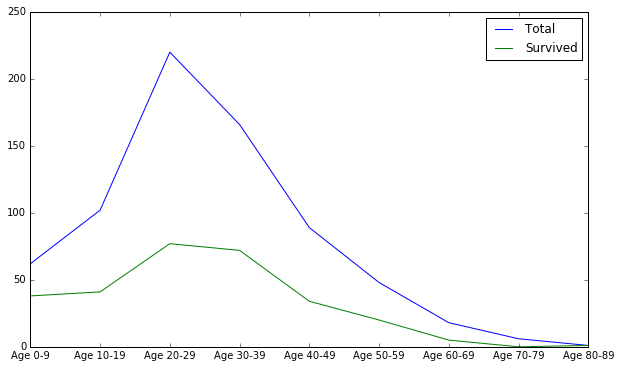

In [548]:
#Compare survivor rates within each age group
age_brackets.plot(y=["Total", "Survived"], figsize=(10,6));

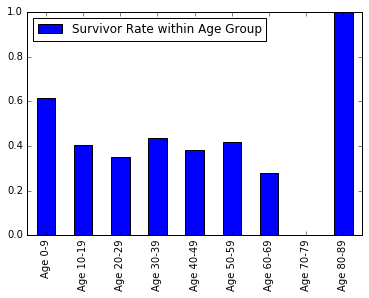

In [549]:
#Show the survivor rate within each age group; note the "Age 80-90" age group is not typical for the results
age_brackets.plot(kind="bar", y=["Survivor Rate within Age Group"])

In [132]:
#Remind myself the max age (although that is in data.describe() above)
data["Age"].max()

80.0

In [133]:
#Same deal but with lowest age
data["Age"].min()

0.41999999999999998

In [527]:
#Find amount of passengers between the ages of 0 and 10
children_count = len(data[(data["Age"] >= 0) & (data["Age"] < 10)])
children_count

62

In [528]:
#Find the amount of survivors between the ages of 0 and 10
children_surv = data[(data["Age"] >= 0) & (data["Age"] < 10)]["Survived"].sum()
children_surv

38

In [529]:
#Find amount of passengers between the ages of 10 and 20
teen_count = len(data[(data["Age"] >= 10) & (data["Age"] < 20)])
teen_count

102

In [531]:
#Find the amount of survivors between the ages of 10 and 20
teen_surv = data[(data["Age"] >= 10) & (data["Age"] < 20)]["Survived"].sum()
teen_surv

41

In [534]:
#Find amount of passengers between the ages of 20 and 30
twenties_count = len(data[(data["Age"] >= 20) & (data["Age"] < 30)])
twenties_count

220

In [533]:
#Find the amount of survivors between the ages of 20 and 30
twenties_surv = data[(data["Age"] >= 20) & (data["Age"] < 30)]["Survived"].sum()
twenties_surv

77

In [535]:
#Find amount of passengers between the ages of 30 and 40
thirties_count = len(data[(data["Age"] >= 30) & (data["Age"] < 40)])
thirties_count

166

In [536]:
#Find the amount of survivors between the ages of 30 and 40
thirties_surv = data[(data["Age"] >= 30) & (data["Age"] < 40)]["Survived"].sum()
thirties_surv

72

In [537]:
#Find amount of passengers between the ages of 40 and 50
forties_count = len(data[(data["Age"] >= 40) & (data["Age"] < 50)])
forties_count

89

In [538]:
#Find the amount of survivors between the ages of 40 and 50
forties_surv = data[(data["Age"] >= 40) & (data["Age"] < 50)]["Survived"].sum()
forties_surv

34

In [539]:
#Find amount of passengers between the ages of 50 and 60
fifties_count = len(data[(data["Age"] >= 50) & (data["Age"] < 60)])
fifties_count

48

In [540]:
#Find the amount of survivors between the ages of 50 and 60
fifties_surv = data[(data["Age"] >= 50) & (data["Age"] < 60)]["Survived"].sum()
fifties_surv

20

In [542]:
#Find amount of passengers between the ages of 60 and 70
sixties_count = len(data[(data["Age"] >= 60) & (data["Age"] < 70)])
sixties_count

18

In [543]:
#Find the amount of survivors between the ages of 60 and 70
sixties_surv = data[(data["Age"] >= 60) & (data["Age"] < 70)]["Survived"].sum()
sixties_surv

5

In [544]:
#Find amount of passengers between the ages of 70 and 80
seventies_count = len(data[(data["Age"] >= 70) & (data["Age"] < 80)])
seventies_count

6

In [545]:
#Find the amount of survivors between the ages of 70 and 80
seventies_surv = data[(data["Age"] >= 70) & (data["Age"] < 80)]["Survived"].sum()
seventies_surv

0

In [546]:
#Find amount of passengers between the ages of 80 and 90
eighties_count = len(data[(data["Age"] >= 80) & (data["Age"] < 90)])
eighties_count

1

In [547]:
#Find the amount of survivors between the ages of 80 and 90
eighties_surv = data[(data["Age"] >= 80) & (data["Age"] < 90)]["Survived"].sum()
eighties_surv

1

In [550]:
#Create data frame to represent "Total" and "Survival" by age bracket
age_data = {"Total": [children_count, teen_count, twenties_count, thirties_count, forties_count, fifties_count, sixties_count, seventies_count, eighties_count],
        "Survived": [children_surv, teen_surv, twenties_surv, thirties_surv, forties_surv, fifties_surv, sixties_surv, seventies_surv, eighties_surv],
         }
age_brackets = pd.DataFrame(age_data, columns=["Total", "Survived"], index=["Age 0-9", "Age 10-19", "Age 20-29", "Age 30-39", "Age 40-49", "Age 50-59", "Age 60-69", "Age 70-79", "Age 80-89"])
age_brackets

,Total,Survived
Age 0-9,62,38
Age 10-19,102,41
Age 20-29,220,77
Age 30-39,166,72
Age 40-49,89,34
Age 50-59,48,20
Age 60-69,18,5
Age 70-79,6,0
Age 80-89,1,1


In [551]:
#This way we can see the survival rate within age group
age_brackets["Survivor Rate within Age Group"] = age_brackets["Survived"]/age_brackets["Total"]
age_brackets

,Total,Survived,Survivor Rate within Age Group
Age 0-9,62,38,0.612903
Age 10-19,102,41,0.401961
Age 20-29,220,77,0.350000
Age 30-39,166,72,0.433735
Age 40-49,89,34,0.382022
Age 50-59,48,20,0.416667
Age 60-69,18,5,0.277778
Age 70-79,6,0,0.000000
Age 80-89,1,1,1.000000


In [552]:
#This will show how much each age group composes the survivor population
age_brackets["Portion of Survivors"] = [float(i)/surv_sum for i in age_brackets["Survived"]]
age_brackets

,Total,Survived,Survivor Rate within Age Group,Portion of Survivors
Age 0-9,62,38,0.612903,0.131944
Age 10-19,102,41,0.401961,0.142361
Age 20-29,220,77,0.350000,0.267361
Age 30-39,166,72,0.433735,0.250000
Age 40-49,89,34,0.382022,0.118056
Age 50-59,48,20,0.416667,0.069444
Age 60-69,18,5,0.277778,0.017361
Age 70-79,6,0,0.000000,0.000000
Age 80-89,1,1,1.000000,0.003472


In [553]:
#This will show the overall survivor rate
age_brackets["Overall Rate of Survival"] = [float(i)/passengers_count for i in age_brackets["Survived"]]
age_brackets

,Total,Survived,Survivor Rate within Age Group,Portion of Survivors,Overall Rate of Survival
Age 0-9,62,38,0.612903,0.131944,0.053371
Age 10-19,102,41,0.401961,0.142361,0.057584
Age 20-29,220,77,0.350000,0.267361,0.108146
Age 30-39,166,72,0.433735,0.250000,0.101124
Age 40-49,89,34,0.382022,0.118056,0.047753
Age 50-59,48,20,0.416667,0.069444,0.028090
Age 60-69,18,5,0.277778,0.017361,0.007022
Age 70-79,6,0,0.000000,0.000000,0.000000
Age 80-89,1,1,1.000000,0.003472,0.001404


In [554]:
#First, taking a look at overall rate of survival (sorted from highest to lowest)
age_brackets.sort_values(by=["Overall Rate of Survival"], ascending = False)

,Total,Survived,Survivor Rate within Age Group,Portion of Survivors,Overall Rate of Survival
Age 20-29,220,77,0.350000,0.267361,0.108146
Age 30-39,166,72,0.433735,0.250000,0.101124
Age 10-19,102,41,0.401961,0.142361,0.057584
Age 0-9,62,38,0.612903,0.131944,0.053371
Age 40-49,89,34,0.382022,0.118056,0.047753
Age 50-59,48,20,0.416667,0.069444,0.028090
Age 60-69,18,5,0.277778,0.017361,0.007022
Age 80-89,1,1,1.000000,0.003472,0.001404
Age 70-79,6,0,0.000000,0.000000,0.000000


In [555]:
#Next, taking a look at survivor rate within age group (sorted from highest to lowest)
age_brackets.sort_values(by=["Survivor Rate within Age Group"], ascending = False)

,Total,Survived,Survivor Rate within Age Group,Portion of Survivors,Overall Rate of Survival
Age 80-89,1,1,1.000000,0.003472,0.001404
Age 0-9,62,38,0.612903,0.131944,0.053371
Age 30-39,166,72,0.433735,0.250000,0.101124
Age 50-59,48,20,0.416667,0.069444,0.028090
Age 10-19,102,41,0.401961,0.142361,0.057584
Age 40-49,89,34,0.382022,0.118056,0.047753
Age 20-29,220,77,0.350000,0.267361,0.108146
Age 60-69,18,5,0.277778,0.017361,0.007022
Age 70-79,6,0,0.000000,0.000000,0.000000


<h2>6) Given the above, do you have any guesses on what predicts survival?</h2>

Much of what we have been examining above predicts survival:  gender, passenger class, and age. A female was ~75% likely to survive, while a first-class passenger was ~65% likely to survive in their respective population pools. Similarly, children aged 0-9 were ~61% likely to survive. These odds are better than random and are in their favor. Meanwhile, adult-aged men in lower classes (namely the third class) were much more likely to die.

In order to confirm that a combination of attributes further helps or hurts a passenger, I did some more exploration below.

In [560]:
#Compare survival using gender and passenger class data
#First, find survivors
gender_class_g = data.groupby(["Sex","Pclass"])["Survived"].sum()
gender_class_g = pd.DataFrame(gender_class_g)

#Then, find total
gender_class_t = data.groupby(["Sex","Pclass"])["Survived"].count()
gender_class_t = pd.DataFrame(gender_class_t)
gender_class_t = gender_class_t.rename(columns={"Survived": "Total"})

#Create one mega DataFrame
gender_class_g["Total"] = gender_class_t["Total"]

#Find some survival rates for passengers with both attributes gender+passenger_class
gender_class_g["Survival Rate"] = gender_class_g["Survived"] / gender_class_g["Total"]
gender_class_g


Survived  Total  Survival Rate
Sex    Pclass                                
female 1             80     83       0.963855
       2             68     74       0.918919
       3             47    102       0.460784
male   1             40    101       0.396040
       2             15     99       0.151515
       3             38    253       0.150198

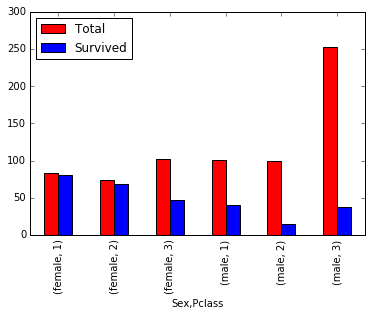

In [564]:
gender_class_g.plot(kind="bar", y=["Total", "Survived"], colors=["r", "b"])

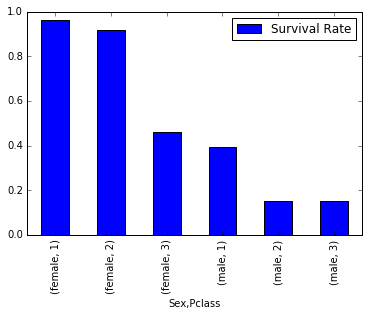

In [565]:
gender_class_g.plot(kind="bar", y=["Survival Rate"])

Females in first- and second-class survived at rates over 90%, while females in third-class only survived at a ~46% rate. Men in first-class only survived at a rate of ~40%. The drop-off thereafter is huge. Thus, it does indeed greatly benefit a passenger to be BOTH a woman and a first-class (or even second-class) passenger.

<h2>7) Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?</h2>

<ul>
    <li>Implementing the age brackets to help hone in on accurately predicting survival could be helpful</li>
    <li>Focusing on whether having family onboard ("SibSp" and "Parch") had an effect on survival would be interesting to know (see below)</li>
    <li>Perhaps also taking a look at the departure city and whether it has an impact on survival (see below)</li>

In [608]:
#Take a look at the impact having family onboard has on survival; Add the Sibplings/Spouse and Parents/Children values
familys = data["SibSp"] + data["Parch"] #duplicates?
familys = pd.DataFrame(data=familys, columns=["Family"])
familys["Survived"] = data["Survived"]

#Look at survivors per number of family members
family_sum = familys.groupby(["Family"])["Survived"].sum()
familys_sum = pd.DataFrame(familys_sum)

#Look at total per number of family members
familys_count = familys.groupby(["Family"])["Survived"].count()
familys_count = pd.DataFrame(familys_count)
familys_count = familys_count.rename(columns={"Survived": "Total"})

#Add total column to survivor dataframe
familys_sum["Total"] = familys_count["Total"]

#Calculate survivor rate
familys_sum["Family Survival Rate"] = familys_sum["Survived"] / familys_sum["Total"]

#Sort DataFrame to better view info
familys_sum.sort_values(by="Family Survival Rate", ascending=False)

,Survived,Total,Family Survival Rate
Family,,,
3,21,27,0.777778
2,53,93,0.569892
1,76,139,0.546763
6,4,12,0.333333
0,128,402,0.318408
4,3,11,0.272727
5,3,22,0.136364
7,0,6,0.000000


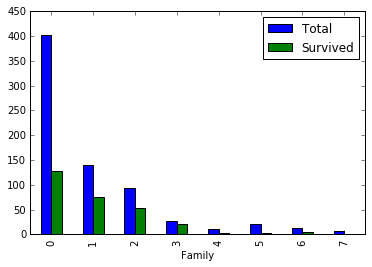

In [582]:
familys_sum.plot(kind="bar", y=["Total", "Survived"],)

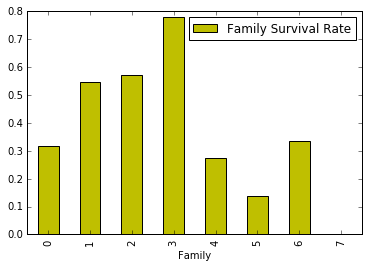

In [583]:
familys_sum.plot(kind="bar", y=["Family Survival Rate"], colors=["y"])

Here, it looks like family does have some effect on survival. Those with small families (1-3, with 3 being the most beneficial) fare the best. Those without any family (0), the largest pool of people, do not do very well (~32% rate of survival within that pool). However, those with large families (6 or 7--although, there is but a small group of people that fit that description) are unlikely to survive.

In [592]:
# Take a look at survivor rate by city (C = Cherbourg; Q = Queenstown; S = Southampton)
embarked_sum = data.groupby(["Embarked"])["Survived"].sum()
embarked_sum = pd.DataFrame(embarked_sum)

embarked_count = data.groupby(["Embarked"])["Survived"].count()
embarked_count = pd.DataFrame(embarked_count)
embarked_count = embarked_count.rename(columns={"Survived": "Total"})

embarked_sum["Total"] = embarked_count["Total"]

#Calculate survivor rate
embarked_sum["City Embarked Survival Rate"] = embarked_sum["Survived"] / embarked_sum["Total"]

#Sort DataFrame to better view info
embarked_sum.sort_values(by="City Embarked Survival Rate", ascending=False)

,Survived,Total,City Embarked Survival Rate
Embarked,,,
C,79,130,0.607692
S,201,554,0.362816
Q,8,28,0.285714


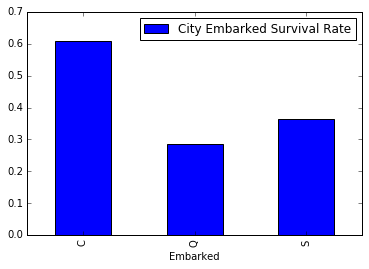

In [607]:
embarked_sum.plot(kind="bar", y=["City Embarked Survival Rate"])

In [615]:
# Take a look at some survivor stats for where people embarked and their passenger class
embarked_class_count = data.groupby(["Embarked", "Pclass"])["Survived"].count()
embarked_class_count = pd.DataFrame(embarked_class_count)
embarked_class_count = embarked_class_count.rename(columns={"Survived": "Total"})

embarked_class_sum = data.groupby(["Embarked", "Pclass"])["Survived"].sum()
embarked_class_sum = pd.DataFrame(embarked_class_sum)

embarked_class_count["Survived"] = embarked_class_sum["Survived"]

embarked_class_count["City Embarked Survival Rate with Class"] = embarked_class_count["Survived"] / embarked_class_count["Total"]

embarked_class_count

Total  Survived  City Embarked Survival Rate with Class
Embarked Pclass                                                         
C        1          74        53                                0.716216
         2          15         8                                0.533333
         3          41        18                                0.439024
Q        1           2         1                                0.500000
         2           2         1                                0.500000
         3          24         6                                0.250000
S        1         108        66                                0.611111
         2         156        74                                0.474359
         3         290        61                                0.210345

Cherbourg had a higher rate of survival (~60%) compared to the other two cities, and I suspected it had something to do with class. Even though there are members from the second and third class onboard from Cherbourg, first class makes up the largest percentage for that particular city. Most people boarded the boat at Southampton, and even though more first class passengers boarded there than at Cherbourg, there were many other-class passengers who boarded as well, diluting the survivor rate.